In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, GridSearchCV,cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
data = 'dry_bean_dataset.csv'
df = pd.read_csv(data, header=None,encoding='ISO-8859-1')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,ï»¿Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
1,28395,610.291,208.1781167,173.888747,1.197191424,0.549812187,28715,190.1410973,0.763922518,0.988855999,0.958027126,0.913357755,0.007331506,0.003147289,0.834222388,0.998723889,SEKER
2,28734,638.018,200.5247957,182.7344194,1.097356461,0.411785251,29172,191.2727505,0.783968133,0.984985603,0.887033637,0.953860842,0.006978659,0.003563624,0.909850506,0.998430331,SEKER
3,29380,624.11,212.8261299,175.9311426,1.209712656,0.562727317,29690,193.4109041,0.778113248,0.989558774,0.947849473,0.908774239,0.007243912,0.003047733,0.825870617,0.999066137,SEKER
4,30008,645.884,210.557999,182.5165157,1.153638059,0.498615976,30724,195.4670618,0.782681273,0.976695743,0.903936374,0.928328835,0.007016729,0.003214562,0.861794425,0.994198849,SEKER


### Rename the columns ###

In [4]:
col_names = ['Area','Perimeter','MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
            'Extent','Solidity','roundness', 'Compactness', 'ShapeFactor1','ShapeFactor2', 'ShapeFactor3','ShapeFactor4','Class']
df.columns = col_names

In [5]:
df = df.drop([0])
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
1,28395,610.291,208.1781167,173.888747,1.197191424,0.549812187,28715,190.1410973,0.763922518,0.988855999,0.958027126,0.913357755,0.007331506,0.003147289,0.834222388,0.998723889,SEKER
2,28734,638.018,200.5247957,182.7344194,1.097356461,0.411785251,29172,191.2727505,0.783968133,0.984985603,0.887033637,0.953860842,0.006978659,0.003563624,0.909850506,0.998430331,SEKER
3,29380,624.11,212.8261299,175.9311426,1.209712656,0.562727317,29690,193.4109041,0.778113248,0.989558774,0.947849473,0.908774239,0.007243912,0.003047733,0.825870617,0.999066137,SEKER
4,30008,645.884,210.557999,182.5165157,1.153638059,0.498615976,30724,195.4670618,0.782681273,0.976695743,0.903936374,0.928328835,0.007016729,0.003214562,0.861794425,0.994198849,SEKER
5,30140,620.134,201.8478822,190.2792788,1.06079802,0.333679658,30417,195.896503,0.773098035,0.99089325,0.984877069,0.970515523,0.00669701,0.003664972,0.941900381,0.999166059,SEKER


### Feature vector X and target variable y ###

In [6]:
X = df.drop(['Class'], axis=1)

y = df['Class']

### Standardize the features

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Logist regression

In [8]:
# Create a logistic regression object
log_reg = LogisticRegression(max_iter=500)

# cross validation
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(log_reg, X, y, cv=cv, scoring='accuracy')


### Visualization of accuracy at different steps of cross-validation

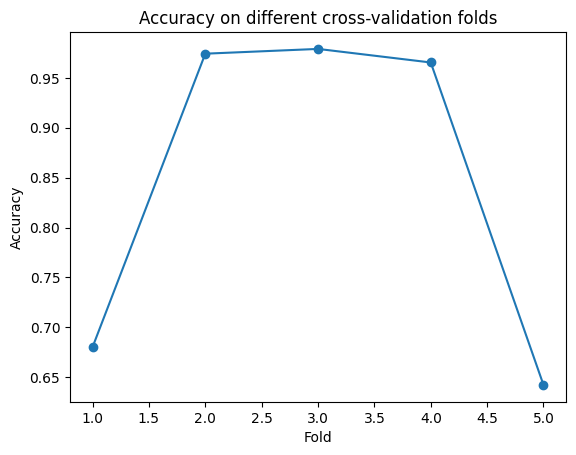

In [9]:
plt.plot(range(1, 6), cross_val_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy on different cross-validation folds')
plt.show()

### Selection of hyperparameters using GridSearchCV

In [10]:
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [11]:
best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')

Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validation accuracy: 0.8634


### Prediction and error matrix

In [12]:
y_pred = cross_val_predict(best_model, X, y, cv=cv)
conf_matrix = confusion_matrix(y, y_pred)

# Compute accuracy score
accuracy_lr = accuracy_score(y, y_pred)

# Display accuracy score
print("Accuracy: {:.2f}%".format(accuracy_lr*100))

Accuracy: 86.33%


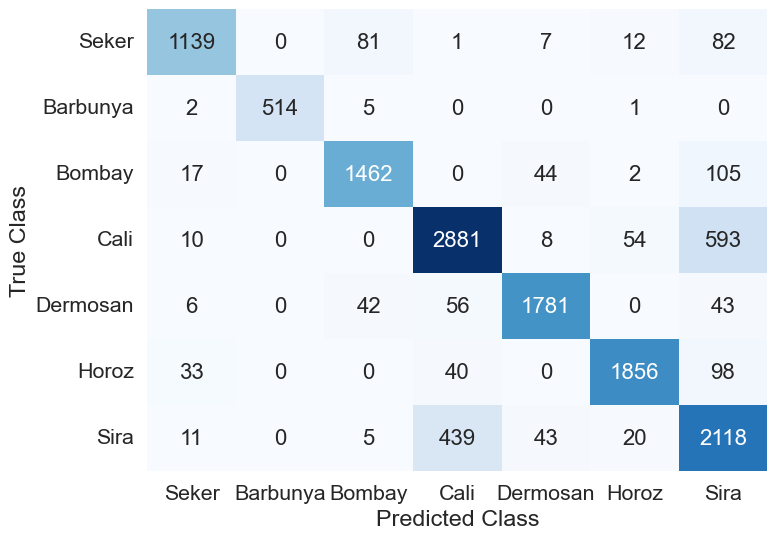

In [13]:
# Create a list of class names
class_names_lr = ['Seker', 'Barbunya', 'Bombay', 'Cali', 'Dermosan', 'Horoz', 'Sira']

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Increase font size
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False, xticklabels=class_names_lr, yticklabels=class_names_lr)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Visualization of accuracy when changing hyperparameters

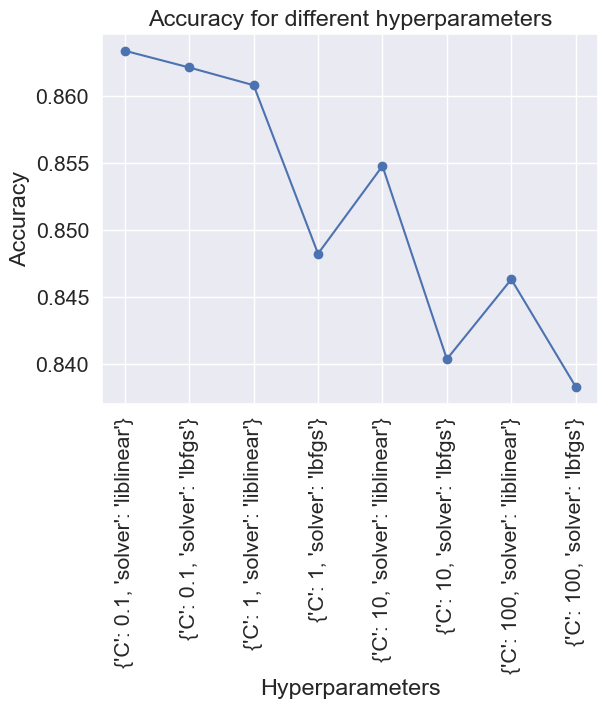

In [14]:
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
param_values = [str(params) for params in results['params']]

plt.plot(param_values, mean_test_scores, marker='o')
plt.xlabel('Hyperparameters')
plt.ylabel('Accuracy')
plt.title('Accuracy for different hyperparameters')
plt.xticks(rotation=90)
plt.show()

# Random Forest

In [15]:
rnd_for_cla = RandomForestClassifier(criterion='entropy', random_state=42)

# cross validation
cv_rf = StratifiedKFold(n_splits=5)
cross_val_scores_rf = cross_val_score(rnd_for_cla, X, y, cv=cv_rf, scoring='accuracy')

### Visualization of accuracy at different steps of cross-validation

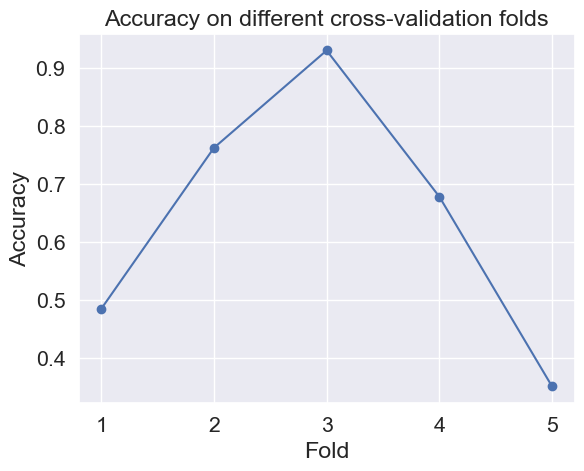

In [16]:
plt.plot(range(1, 6), cross_val_scores_rf, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy on different cross-validation folds')
plt.show()

### Selection of hyperparameters using RandomizedSearchCV

In [17]:
# Set up a grid of hyperparameters to search over
param_distributions  = {'n_estimators': [10, 20, 30],
              'max_depth': range(1,21)}

random_search = RandomizedSearchCV(rnd_for_cla, param_distributions, n_iter=10, cv=cv_rf, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 21),
                                        'n_estimators': [10, 20, 30]},
                   random_state=42, scoring='accuracy')

### Best Model

In [19]:
# Лучшая модель
best_model_rf = random_search.best_estimator_
print(f'Best parameters: {random_search.best_params_}')
print(f'Best cross-validation accuracy: {random_search.best_score_:.4f}')

Best parameters: {'n_estimators': 10, 'max_depth': 5}
Best cross-validation accuracy: 0.6990


### Prediction and error matrix

In [20]:
y_pred_rf = cross_val_predict(best_model_rf, X, y, cv=cv_rf)
conf_matrix_rf = confusion_matrix(y, y_pred_rf)

# Compute accuracy score
accuracy_rf = accuracy_score(y, y_pred_rf)

# Display accuracy score
print("Accuracy: {:.2f}%".format(accuracy_rf*100))

Accuracy: 69.90%


### Plot confusion matrix as heatmap

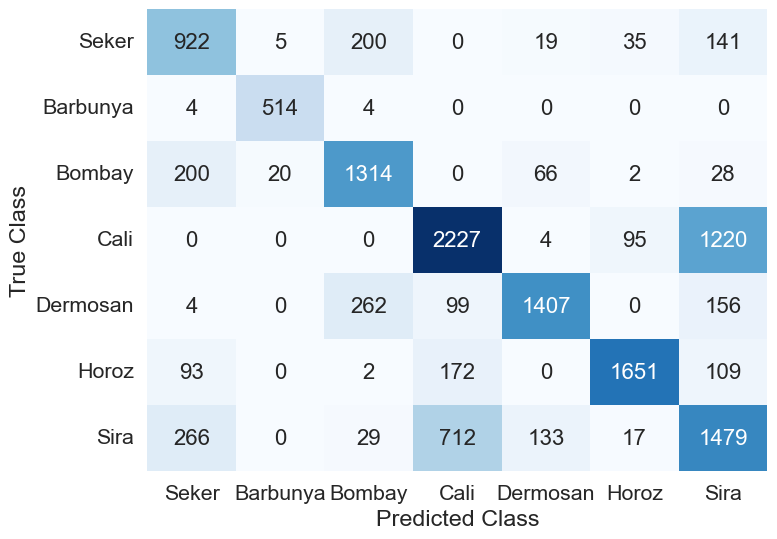

In [21]:
# Create a list of class names
class_names_rf = ['Seker', 'Barbunya', 'Bombay', 'Cali', 'Dermosan', 'Horoz', 'Sira']

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Increase font size
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False, xticklabels=class_names_rf, yticklabels=class_names_rf)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Plot the cross-validation scores

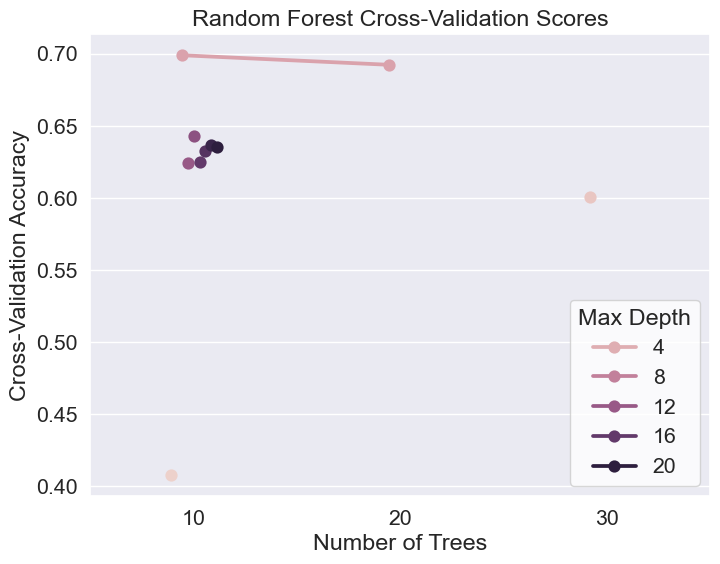

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('whitegrid')
sns.pointplot(x='param_n_estimators', y='mean_test_score', hue='param_max_depth', data=pd.DataFrame(random_search.cv_results_), dodge=True, ax=ax)
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Cross-Validation Accuracy')
ax.set_xticks(range(len(param_distributions['n_estimators'])))
ax.set_xticklabels(param_distributions['n_estimators'])
ax.legend(title='Max Depth', loc='lower right')
ax.set_title('Random Forest Cross-Validation Scores')
plt.show()

## Logistic Regression vs Random Forest

### Display accuracy score

In [23]:
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_lr*100))
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf*100))
print()

Logistic Regression Accuracy: 86.33%
Random Forest Accuracy: 69.90%



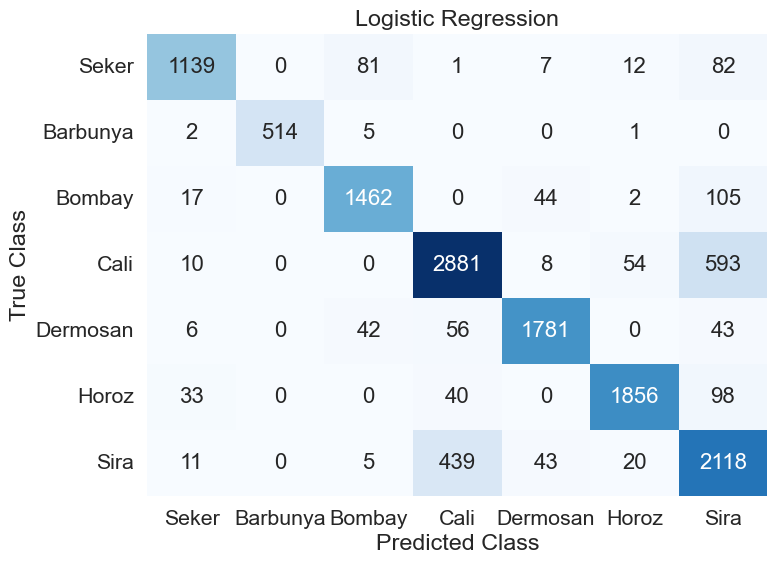

In [24]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Increase font size
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False, xticklabels=class_names_lr, yticklabels=class_names_lr)
plt.title('Logistic Regression')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

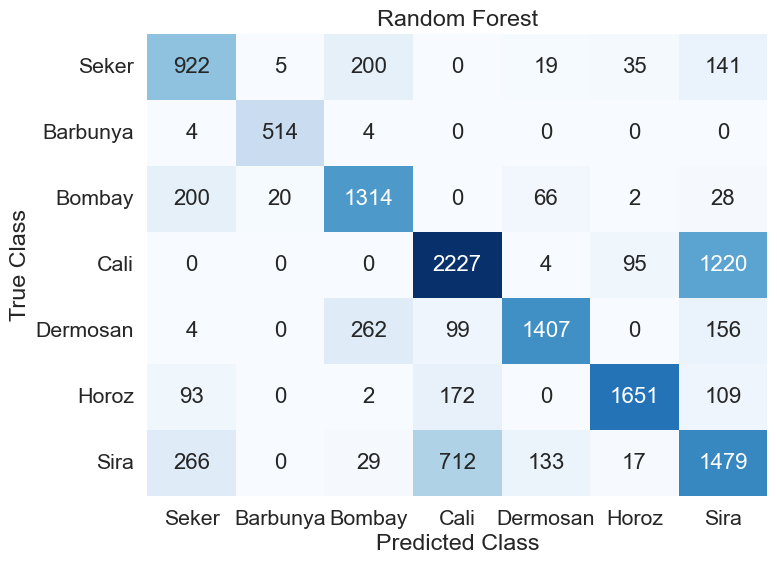

In [25]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Increase font size
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False, xticklabels=class_names_rf, yticklabels=class_names_rf)
plt.title('Random Forest')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# LW 04 Perceptron

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [27]:
data = 'dry_bean_dataset.csv'
df = pd.read_csv(data, header=None,encoding='ISO-8859-1')

### Rename the columns

In [28]:
col_names = ['Area','Perimeter','MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
            'Extent','Solidity','roundness', 'Compactness', 'ShapeFactor1','ShapeFactor2', 'ShapeFactor3','ShapeFactor4','Class']
df.columns = col_names

In [29]:
df = df.drop([0])
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
1,28395,610.291,208.1781167,173.888747,1.197191424,0.549812187,28715,190.1410973,0.763922518,0.988855999,0.958027126,0.913357755,0.007331506,0.003147289,0.834222388,0.998723889,SEKER
2,28734,638.018,200.5247957,182.7344194,1.097356461,0.411785251,29172,191.2727505,0.783968133,0.984985603,0.887033637,0.953860842,0.006978659,0.003563624,0.909850506,0.998430331,SEKER
3,29380,624.11,212.8261299,175.9311426,1.209712656,0.562727317,29690,193.4109041,0.778113248,0.989558774,0.947849473,0.908774239,0.007243912,0.003047733,0.825870617,0.999066137,SEKER
4,30008,645.884,210.557999,182.5165157,1.153638059,0.498615976,30724,195.4670618,0.782681273,0.976695743,0.903936374,0.928328835,0.007016729,0.003214562,0.861794425,0.994198849,SEKER
5,30140,620.134,201.8478822,190.2792788,1.06079802,0.333679658,30417,195.896503,0.773098035,0.99089325,0.984877069,0.970515523,0.00669701,0.003664972,0.941900381,0.999166059,SEKER


### Feature vector X and target variable y

In [30]:
X = df.drop(['Class'], axis=1)

y = df['Class']

### Standardize the features

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
# Set up a grid of hyperparameters to search over
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
              'max_iter': [1000, 5000, 10000]}

In [33]:
# Create a perceptron object
perceptron = Perceptron(penalty='l2', alpha=0.001, max_iter=1000, tol=1e-3, random_state=42, eta0=1.0, verbose=0)

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(perceptron, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)

# Make predictions using cross-validation
y_pred = cross_val_predict(grid_search.best_estimator_, X, y, cv=10)

# Compute accuracy score
accuracy_p = accuracy_score(y, y_pred)

# Compute confusion matrix
cm_p = confusion_matrix(y, y_pred)

# Display accuracy score
print("Accuracy: {:.2f}%".format(accuracy_p*100))

Accuracy: 86.69%


In [34]:
# Create a list of class names
class_names_p = ['Seker', 'Barbunya', 'Bombay', 'Cali', 'Dermosan', 'Horoz', 'Sira']

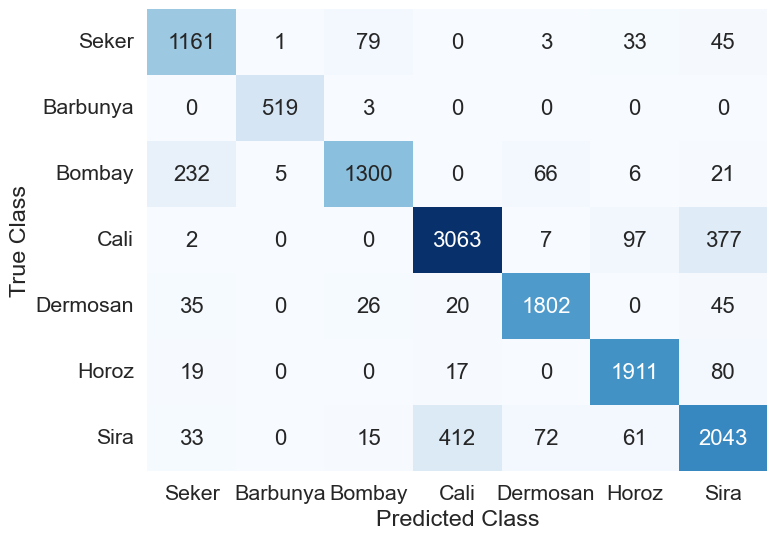

In [35]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Increase font size
sns.heatmap(cm_p, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False, xticklabels=class_names_p, yticklabels=class_names_p)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [36]:
# Print the best hyperparameters and the associated accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: {:.2f}%".format(grid_search.best_score_*100))

Best hyperparameters:  {'alpha': 0.0001, 'max_iter': 1000}
Best accuracy: 86.69%


## Logistic Regression vs Random Forest vs Perceptron

In [37]:
# Display accuracy score
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_lr*100))
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf*100))
print("Perceptron Accuracy: {:.2f}%".format(accuracy_p*100))
print()

Logistic Regression Accuracy: 86.33%
Random Forest Accuracy: 69.90%
Perceptron Accuracy: 86.69%



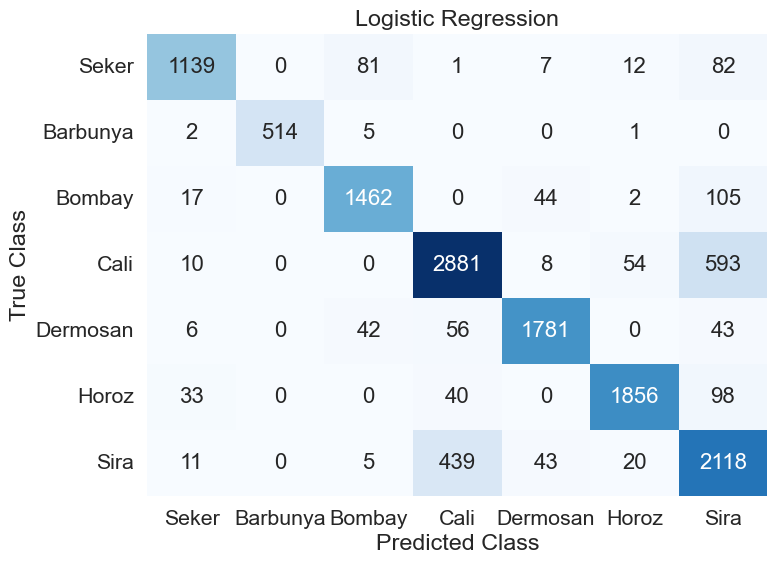

In [38]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Increase font size
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False, xticklabels=class_names_lr, yticklabels=class_names_lr)
plt.title('Logistic Regression')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

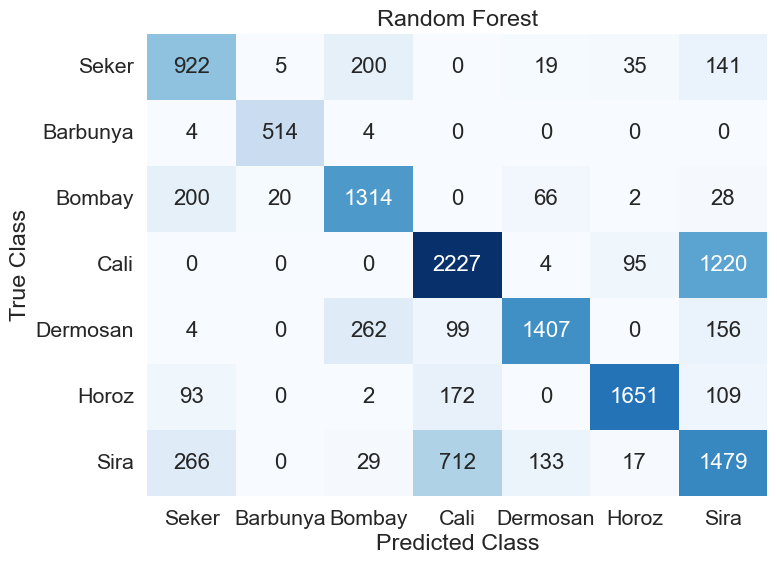

In [39]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Increase font size
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False, xticklabels=class_names_rf, yticklabels=class_names_rf)
plt.title('Random Forest')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

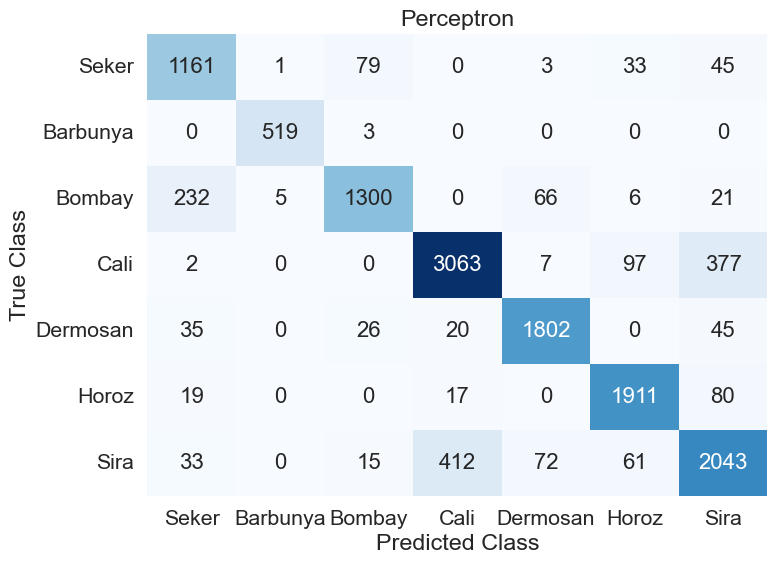

In [40]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Increase font size
sns.heatmap(cm_p, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16}, cbar=False, xticklabels=class_names_p, yticklabels=class_names_p)
plt.title('Perceptron')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()